In [28]:
import ginga

In [29]:
from ginga.web.pgw import ipg


In [30]:
use_opencv = False

server = ipg.make_server(host='localhost', port=8709, use_opencv=use_opencv)
server.start(no_ioloop=True)

In [31]:
v1 = server.get_viewer('v1')
v1.url
v1.load('bgc.fits')

In [32]:
v1.open()
v1.url


'http://localhost:8709/app?id=v1'

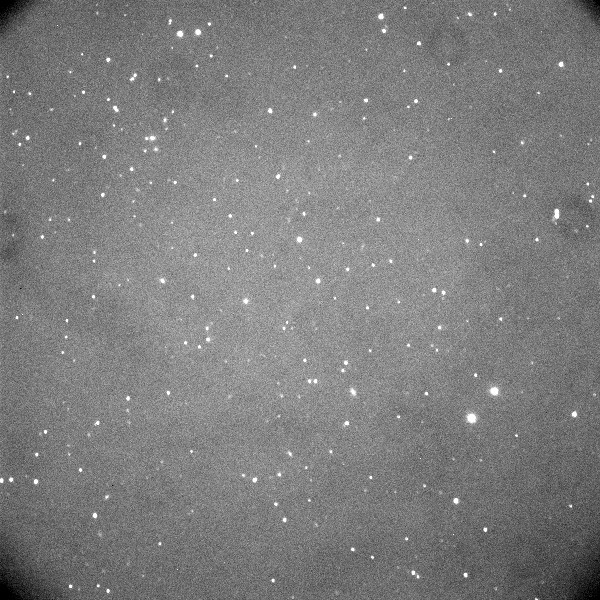

In [33]:
canvas = v1.add_canvas()

In [34]:
# delete all objects on the canvas
canvas.delete_all_objects()
# set the drawing parameters
canvas.set_drawtype('point', color='black')

In [35]:
p = canvas.objects[0]
p.x, p.y

(1607.395, 618.0116666666667)

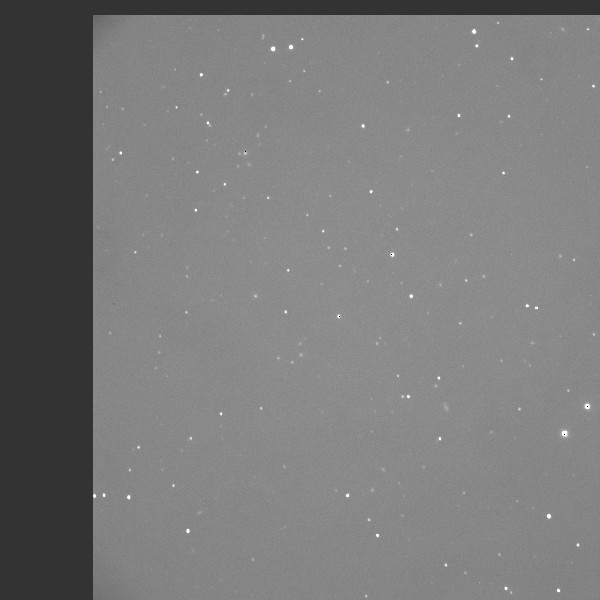

In [144]:
# Find approximate bright peaks in a sub-area
from ginga.util import iqcalc
iq = iqcalc.IQCalc()
import numpy as np
img = v1.get_image()
v1.cut_levels(170,2000)
v1.show()


In [36]:
canvas.delete_all_objects()
canvas.set_drawtype('square')


In [37]:
from ginga.util import iqcalc
iq = iqcalc.IQCalc()

img = v1.get_image()
r = canvas.objects[0]
data = img.cutout_shape(r)
peaks = iq.find_bright_peaks(data)

/home/vivek/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [38]:
len(peaks)

105

In [39]:
obj=iq.evaluate_peaks(peaks,data)

In [40]:
len(obj)

105

In [41]:
import numpy as np
fw=np.zeros(len(obj))
for i in range(0,len(obj)):
    fw[i]=obj[i]['fwhm']
    
print('Median FWHM',np.median(fw),0.53*np.median(fw))
print('Mean FWHM',np.mean(fw),0.53*np.mean(fw))

Median FWHM 7.297935906216971 3.8679060302949946
Mean FWHM 8.489082724425849 4.4992138439457


In [24]:
obj[0]

{'objx': 740.5792406764945, 'objy': 2.8890188712608262, 'pos': 0.9383734495475099, 'oid_x': 740.9796303416412, 'oid_y': 7.904382980725397, 'fwhm_x': 6.348442360599853, 'fwhm_y': 5.848889807061536, 'fwhm': 6.10377884515023, 'fwhm_radius': 15, 'brightness': 179.91817969647735, 'elipse': 0.9213110043120696, 'x': 741, 'y': 1, 'skylevel': 1273.75, 'background': 1175.0}